In [2]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np

train_data = pd.read_csv('traindata_us.csv')
test_data = pd.read_csv('testdata_us.csv')
X_train = train_data.ix[:,['upcount 20','breakfromlow','rise percent','maxvol 10']]
y_train = train_data.ix[:,['breakprofit']]
X_test = test_data.ix[:,['upcount 20','breakfromlow','rise percent','maxvol 10']]
y_true = test_data.ix[:,['breakprofit']]

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

y_predict = pd.DataFrame({'breakprofit':list(y_predict)})
y_predict.index = y_true.index.tolist()

wrong_buy = 0
correct_buy = 0

for i in range(0,len(y_predict)):
    if y_predict.iloc[i]['breakprofit'] == 1:
        if y_true.iloc[i]['breakprofit'] == 0:
            print ('wrong predict for buy: ',test_data.iloc[i]['stocksymbol'],' ',test_data.iloc[i]['date'])
            wrong_buy += 1
        if y_true.iloc[i]['breakprofit'] == 1:
            print ('correct predict for buy: ',test_data.iloc[i]['stocksymbol'],' ',test_data.iloc[i]['date'])
            correct_buy += 1
total_buy = wrong_buy + correct_buy
if correct_buy > 0:
    print ('correct buy: ', correct_buy, 'wrong_buy: ', wrong_buy, 'total buy: ', total_buy)
    record = 'total predict: ', accuracy_score(y_true,y_predict), 'buy predict: ', correct_buy/total_buy
    print (record)

wrong predict for buy:  TSLA   2017-10-18
correct predict for buy:  TSLA   2017-12-11
correct predict for buy:  TSLA   2018-05-30
correct predict for buy:  GOOGL   2017-09-27
wrong predict for buy:  GOOGL   2018-03-09
correct predict for buy:  GOOGL   2018-05-10
correct predict for buy:  FB   2018-01-02
wrong predict for buy:  FB   2018-04-17
correct buy:  5 wrong_buy:  3 total buy:  8
('total predict: ', 0.55555555555555558, 'buy predict: ', 0.625)


C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[ 0.20874387  0.07356409  0.65721839  0.06047364] ['upcount 20' 'breakfromlow' 'rise percent' 'maxvol 10']


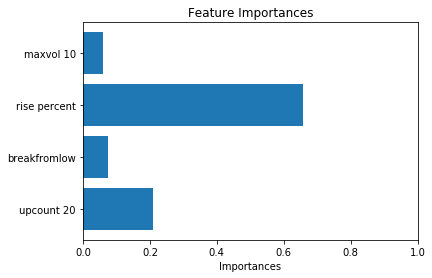

In [3]:
import matplotlib.pyplot as plt

y_importances = clf.feature_importances_
x_importances = X_train.columns.values
print (y_importances,x_importances)
y_pos = np.arange(len(x_importances))

plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances)
plt.xlabel('Importances')
plt.xlim(0,1)
plt.title('Feature Importances')
plt.show()